#Machine Learning #1 : Simple Linear Regression 

Dataset: Housing prices

Machine Learning is the science (and art) of programming computers so they can learn from data 


##Supervised Learning
In supervised learning, the training data you feed to the algorithm includes the desired solutions, called labels

A typical supervised learning task is **classification**. The spam filter is a good example of this: it is trained with many examples emails along with their class (spam or ham), and it must learn how to classify new emails.
Another typical task is to predict a target numeric value, such as the price of a car, given a set of features (mileage, age, brand, etc.) called predictors. This sort of task is called **regression**. To train the system, you need to give it many examples of cars, including both their predictors and their labels (i.e., their prices)

##Linear Regression: Univariate
Let's start with a very simple task of linear regression using a sample dataset called Portland Housing Prices, wherein we are given some features of a house (i.e. area, no. of rooms, etc) and predict the target price.

To make things much simpler. Let us use only one feature or in this case one variable, also known as univariate linear regression. That is we are only gonna use the 'Area' of a given house to train a linear model

Let's get the data and examine it!

In [0]:
#importing dependencies
import numpy as np  #python library for scientific computing # linear algebra
import pandas as pd #python library for data analysis and dataframes # data processing, CSV file I/O (e.g. pd.read_csv)

In [0]:
#for uplaodind file on cloud using file chooser in colab
from google.colab import files
uploaded = files.upload()

Saving HousePrice.csv to HousePrice.csv


In [0]:
#to read csv file into dataframe
data=pd.read_csv('HousePrice.csv',header=None)
#The data itself does not contain feature names or labels, let's set that up first. 
#According to the source the first column is the size of the house in sq.ft. followed by the no. of bedrooms and lastly the price.

In [0]:
#to show first 5 records from dataframe
data.head()
#data.shape

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [0]:
#to get rows and colms (dimensions)
data.shape

(47, 3)

In [0]:
#rename the columns with actual col name to make dataframe more readable
data.columns =(['Size','Bedroom','Price'])
data.head()

,Size,Bedroom,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [0]:
#Let us remove the 'Bedroom' feature since we are doing univariate linear regression
data.drop('Bedroom', axis=1, inplace=True)
data.head()

,Size,Price
0,2104,399900
1,1600,329900
2,2400,369000
3,1416,232000
4,3000,539900


In [0]:
#for sample data out of all given sample in the dataset
data = data.sample(frac=1)
data.head()

,Size,Price
26,1458,464500
46,1203,239500
43,1200,299000
11,2000,347000
28,2200,475000


##Now that looks much simpler! Let's plot our data and draw some insights of how a linear model could fit.

In [0]:
# necessary dependencies for plotting
import matplotlib.pyplot as plt #python library for plot and graphs
%matplotlib inline

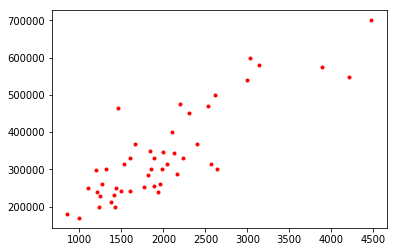

In [0]:
plt.plot(data.Size, data.Price, 'r.')
plt.show()

From the plot results we could see that there is a high correlation between Housing Area and Housing Price (obviously) and therefore we could use a line (linear model) to fit this data.

In [0]:
# another way to test the correlation
data.corr()

,Size,Price
Size,1.000000,0.854988
Price,0.854988,1.000000


##**Linear Model**
The idea of linear regression is to fit a line to a set of points. So let's use the line function given by:
f(x)=y=mx+b
 
where m is the slope and b is our y intercept, or for a more general form (multiple variables)
h(x)=θ0x0+θ1x1+θ2x2+...+θnxn
 
such that for a single variable where n = 1,
h(x)=θ0+θ1x1
 
when x0=1
 
where theta is our parameters (slope and intercept) and h(x) is our hypothesis or predicted value

In [0]:
data.shape

(47, 2)

In [0]:
X = np.array(data.drop('Price',axis=1))
Y = np.array(data.Price)
m = len(data)

print(X.shape)
print(Y.shape)
print(m)

(47, 1)
(47,)
47


Looking at the y variable, it is shaped as a flattened array (47, ) Let's reshape it to a matrix of form (47, 1)

In [0]:
Y = Y.reshape((m,1))
print(Y.shape)

(47, 1)


In [0]:
#to get array of values of size and price cols
# initializing our inputs and outputs
X=data['Size'].values
Y=data['Price'].values

In [0]:
print(X)
print(Y)

[1458 1203 1200 2000 2200 1494 1811 1320 1962 2567  852 1839 2238 1239
 1852 1268 2104 3137 3031 1416 1236 1890 1000 1767 3000 1100 2400 1437
 1985 1534 3890 2300 2637 2609 2040 2526 1664 4215 1427 1888 1600 4478
 2162 1604 2132 1940 1380]
[464500 239500 299000 347000 475000 242500 285900 299900 259900 314000
 179900 349900 329900 229900 299900 259900 399900 579900 599000 232000
 199900 329999 169900 252900 539900 249900 369000 249900 299900 314900
 573900 449900 299900 499998 314900 469000 368500 549000 198999 255000
 329900 699900 287000 242900 345000 239999 212000]


In [0]:
# mean of our inputs and outputs
x_mean = np.mean(X)
y_mean = np.mean(Y)

In [0]:
#total number of values
n = len(X)
# using the formula to calculate the b1 and b0
numerator = 0
denominator = 0
for i in range(n):
    numerator += (X[i] - x_mean) * (Y[i] - y_mean)
    denominator += (X[i] - x_mean) ** 2
    
b1 = numerator / denominator
b0 = y_mean - (b1 * x_mean)
#printing the coefficient
print("Caluculation using formula: ",b1, b0)

#b11=np.cov(X,Y)[1][0]/np.var(X)
#print(b11)

print("N:",numerator/n)
print("D:",denominator/n)
print("Cov:",np.cov(X,Y,bias=True)[0,1])
print("Var:",np.var(X))

Caluculation using formula:  134.52528772024132 71270.49244872911
N: 83152038.72114077
D: 618114.5577184245
Cov: 83152038.72114077
Var: 618114.5577184246


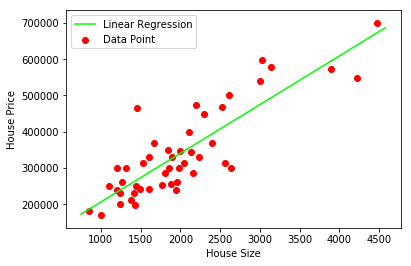

In [0]:
#plotting values 
x_max = np.max(X) + 100
x_min = np.min(X) - 100
#calculating line values of x and y
x = np.linspace(x_min, x_max, 1000)
y = b0 + b1 * x
#plotting line 
plt.plot(x, y, color='#00ff00', label='Linear Regression')
#plot the data point
plt.scatter(X, Y, color='#ff0000', label='Data Point')
# x-axis label
plt.xlabel('House Size')
#y-axis label
plt.ylabel('House Price')
plt.legend()
plt.show()

In [0]:
rmse = 0
for i in range(n):
    y_pred=  b0 + b1* X[i]
    rmse += (Y[i] - y_pred) ** 2
    
rmse = np.sqrt(rmse/n)
print(rmse)

64158.12872010904


In [0]:
#r square
sumofsquares = 0
sumofresiduals = 0
for i in range(n) :
    y_pred = b0 + b1 * X[i]
    sumofsquares += (Y[i] - y_mean) ** 2
    sumofresiduals += (Y[i] - y_pred) **2
    
score  = 1 - (sumofresiduals/sumofsquares)
print(score)

0.7310037839755308


In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

m=len(X)
# Cannot use Rank 1 matrix in scikit learn
X = X.reshape((m, 1))
# Creating Model
reg = LinearRegression()
# Fitting training data
reg = reg.fit(X, Y)
# Y Prediction
Y_pred = reg.predict(X)
 
# Calculating R2 Score
r2_score = reg.score(X, Y)
 
print(r2_score)

0.7310037839755308


In [0]:
x=np.array([1,2,3])

In [0]:
pri